In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
sns.set(rc={'figure.figsize':(11,8)})

In [2]:
token = "" # @param
version = "5.131" # @param
domain = "imct_fefu" # @param

In [3]:
response = requests.get(
    'https://api.vk.com/method/wall.get',
    params={
        'access_token': token,
        'v': version,
        'domain': domain,
        'extended': 1,
        'count': 99999
    }
)

In [4]:
posts = response.json()['response']['items']

In [5]:
profiles = []
comments = []
groups = []

In [6]:
for post in posts:
    # fetch comments
    response = requests.get(
        'https://api.vk.com/method/wall.getComments',
        params={
            'access_token': token,
            'v': version,
            'count': 99999,
            'post_id': post["id"],
            "owner_id": post["owner_id"],
            "extended": 1,
            "need_likes": 1,
            "thread_items_count": 10
        }
    )
    response_data = response.json()["response"]
    # save profiles
    profiles += response_data["profiles"]

    # save groups
    groups += response_data["groups"]
    # save comments
    comments += response_data["items"]
    for item in response_data["items"]:
        comments += item['thread']['items']
    post["comments_items"] = response_data["items"]

    # fetch likes
    # TODO. deprecated

In [7]:
data = []
for post in posts:
    item = [
        post["date"],
        post.get("edited") or None,
        post["text"],
        post["likes"]["count"],
        post.get("likes_items") or [],
        post["comments"]["count"],
        post.get("comments_items") or [],
        post["views"]["count"],
        post.get("attachments") or []
    ]
    data.append(item)

In [8]:
posts_df = pd.DataFrame(
    data,
    columns=[
        "date", "edited", "text", "likes_count", "likes_items", "comments_count", "comments_items",
        "views_count", "attachments"
    ]
)
posts_df['date'] = pd.to_datetime(posts_df['date'],unit='s').dt.tz_localize('Asia/Vladivostok')
posts_df['edited'] = pd.to_datetime(posts_df['edited'],unit='s').dt.tz_localize('Asia/Vladivostok')
posts_df

,date,edited,text,likes_count,likes_items,comments_count,comments_items,views_count,attachments
0,2022-06-16 05:47:58+10:00,2022-06-16 05:48:38+10:00,"Летняя школа фонда «Институт ""Вега""». \n \nC 4...",8,[],4,"[{'id': 247, 'from_id': 224681507, 'date': 165...",316,"[{'type': 'photo', 'photo': {'album_id': -7, '..."
1,2022-06-15 08:17:26+10:00,2022-06-15 08:18:03+10:00,"Надеемся, ты уже зарегистрировался на великий ...",10,[],0,[],399,"[{'type': 'photo', 'photo': {'album_id': -7, '..."
2,2022-06-12 01:12:14+10:00,2022-06-12 05:16:19+10:00,"Турниры по играм показывают, что играть в ИМКТ...",19,[],7,"[{'id': 235, 'from_id': 432019281, 'date': 165...",810,"[{'type': 'photo', 'photo': {'album_id': -7, '..."
3,2022-06-11 00:00:00+10:00,NaT,VI Всероссийская конференция с международным у...,9,[],0,[],452,"[{'type': 'photo', 'photo': {'album_id': -7, '..."
4,2022-06-10 01:02:24+10:00,2022-06-10 01:19:18+10:00,"Помнишь, Сбер [https://vk.com/imct_fefu?w=wall...",14,[],3,"[{'id': 229, 'from_id': 283841494, 'date': 165...",613,"[{'type': 'photo', 'photo': {'album_id': -7, '..."
...,...,...,...,...,...,...,...,...,...
92,2021-10-18 07:12:54+10:00,NaT,"Дальневосточный старт – программа, которая ста...",4,[],0,[],1208,"[{'type': 'photo', 'photo': {'album_id': -7, '..."
93,2021-10-17 05:39:05+10:00,NaT,У Cбера есть ежегодный AI Journey Contest — ма...,4,[],0,[],1004,"[{'type': 'photo', 'photo': {'album_id': -7, '..."
94,2021-10-17 02:48:41+10:00,2021-10-17 05:39:48+10:00,Посвящение в студенты для первокурсников ИМКТ ...,35,[],0,[],1582,"[{'type': 'photo', 'photo': {'album_id': -7, '..."
95,2021-09-08 00:00:00+10:00,NaT,"Те, кто помогают начать — наставники ИМКТ\n\nЕ...",20,[],0,[],2104,"[{'type': 'photo', 'photo': {'album_id': -7, '..."


In [9]:
profiles_df = pd.DataFrame(
    profiles,
    columns=[
        "id", "last_name", "first_name"
    ]
).groupby('id').first().reset_index()
profiles_df

,id,last_name,first_name
0,6303325,Zagumyonnov,Alexey
1,7660555,Al-Saraf,Artyom
2,145662921,Stepanenko,Arkady
3,150609591,Maximov,Pavel
4,151531982,Reshetnev,Nikita
5,176509188,Ipatov,Georgy
6,180190869,Abashkina,Natasha
7,181201565,Dyatlov,Artyom
8,203603517,Kolin,Nikita
9,206458372,Grinyov,Max


In [10]:
groups_df = pd.DataFrame(
    groups,
    columns=[
        "id", "name"
    ]
).groupby('id').first().reset_index()
groups_df

,id,name
0,206944280,ИМКТ ДВФУ


In [11]:
comments_df = pd.DataFrame(
    comments,
    columns=[
        "id", "text", "from_id", "likes", "post_id"
    ]
)
#comments_df['likes'] = comments_df['likes'].map(lambda x: print(type(x)))
comments_df['likes'] = comments_df['likes'].map(lambda x: x["count"] if type(x) == dict else 0)
comments_df

,id,text,from_id,likes,post_id
0,247,123,224681507,0,245
1,248,321?,-206944280,0,245
2,249,"[club206944280|ИМКТ ДВФУ], 456",224681507,0,245
3,251,"Ладно, вы победили.",-206944280,0,245
4,235,Когда будет турнир по Clash Royale?,432019281,4,234
...,...,...,...,...,...
78,67,Сделано в ИМКТ,6303325,5,66
79,68,Сделано в ИМКТ,6303325,0,58
80,18,Поправка в пункте про работу медпункта. Можете...,567222532,0,17
81,13,Та за шо,453334071,11,12


In [12]:
#df.to_csv('output.csv', columns=df.columns)
#from google.colab import files
#files.download("output.csv")

In [22]:
posts_df.to_csv('data/posts.csv', sep=',')
profiles_df.to_csv('data/profiles.csv', sep=',')
groups_df.to_csv('data/groups.csv', sep=',')
comments_df.to_csv('data/comments.csv', sep=',')

In [13]:
scalars_values_by_date = posts_df.copy()
scalars_values_by_date['date'] = scalars_values_by_date['date'].map(lambda x: x.date())
scalars_values_by_date = scalars_values_by_date.groupby('date').agg({
    'likes_count': ['sum'], 
    'comments_count': ['sum'],
    'views_count': ['sum']
}).reset_index()
scalars_values_by_date.columns = ["date", "likes_count", "comment_count", "views_count"]
scalars_values_by_date

,date,likes_count,comment_count,views_count
0,2021-09-07,17,0,1461
1,2021-09-08,20,0,2104
2,2021-10-17,39,0,2586
3,2021-10-18,4,0,1208
4,2021-11-03,28,2,1970
...,...,...,...,...
69,2022-06-10,14,3,613
70,2022-06-11,9,0,452
71,2022-06-12,19,7,810
72,2022-06-15,10,0,399


In [14]:
scalars_values_by_date

,date,likes_count,comment_count,views_count
0,2021-09-07,17,0,1461
1,2021-09-08,20,0,2104
2,2021-10-17,39,0,2586
3,2021-10-18,4,0,1208
4,2021-11-03,28,2,1970
...,...,...,...,...
69,2022-06-10,14,3,613
70,2022-06-11,9,0,452
71,2022-06-12,19,7,810
72,2022-06-15,10,0,399


# Статистика по постам

<AxesSubplot:xlabel='date', ylabel='comment_count'>

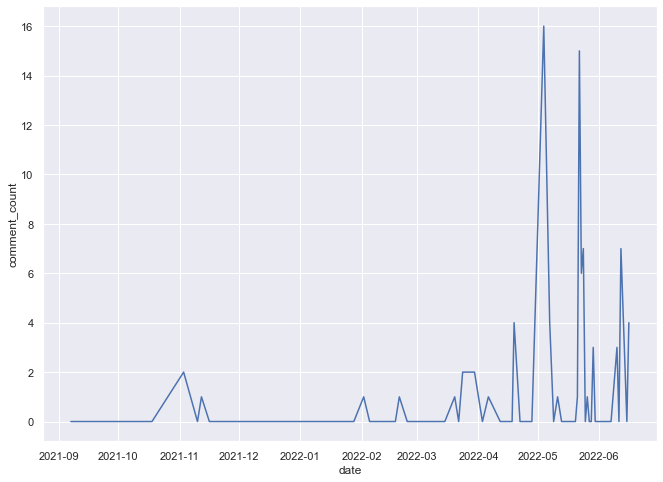

In [15]:
sns.lineplot(data=scalars_values_by_date, x="date", y="comment_count")

<AxesSubplot:xlabel='date', ylabel='likes_count'>

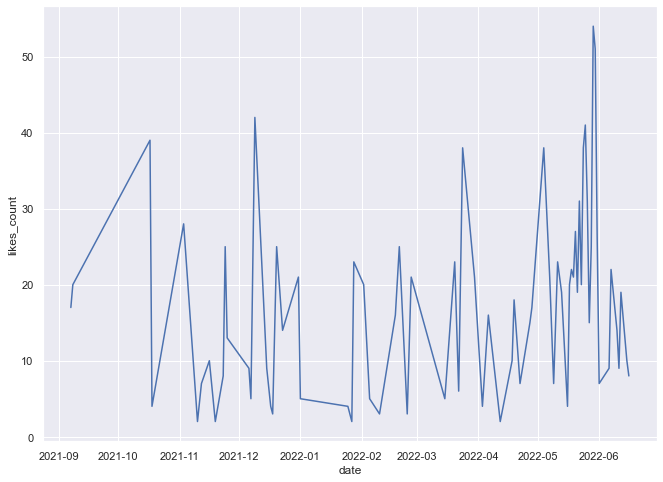

In [16]:
sns.lineplot(data=scalars_values_by_date, x="date", y="likes_count")

# Топ 10 постов

<AxesSubplot:xlabel='date', ylabel='views_count'>

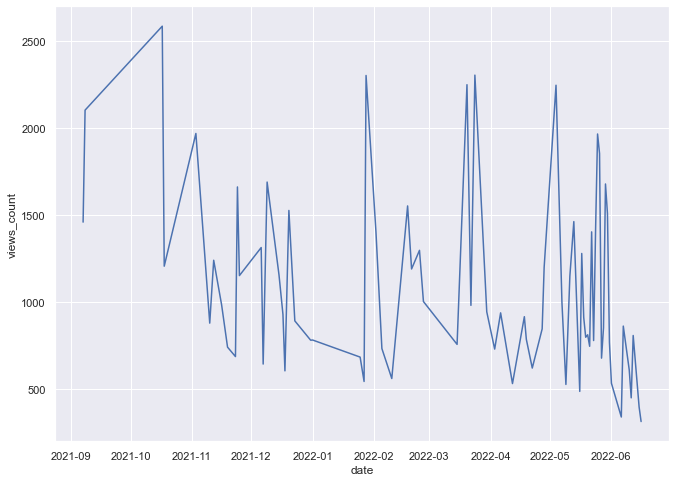

In [17]:
sns.lineplot(data=scalars_values_by_date, x="date", y="views_count")

In [18]:
posts_top_10 = posts_df.sort_values(by=['likes_count', 'views_count'], ascending=[False, False])
posts_top_10

,date,edited,text,likes_count,likes_items,comments_count,comments_items,views_count,attachments
49,2022-03-24 07:00:02+10:00,2022-03-24 07:05:45+10:00,На связи снова IMCTech! \n \nМы к вам с отличн...,38,[],2,"[{'id': 84, 'from_id': 6303325, 'date': 164811...",2305,"[{'type': 'photo', 'photo': {'album_id': -7, '..."
39,2022-05-04 09:09:17+10:00,NaT,Турнир по играм от ИМКТ\n\n14 мая у нас пройдё...,38,[],16,"[{'id': 109, 'from_id': 224681507, 'date': 165...",2247,"[{'type': 'photo', 'photo': {'album_id': -7, '..."
78,2021-12-09 05:00:02+10:00,NaT,"Хой-хой-хой, всем Новофест \n \n25 декабря мы ...",38,[],0,[],1076,"[{'type': 'photo', 'photo': {'album_id': -7, '..."
94,2021-10-17 02:48:41+10:00,2021-10-17 05:39:48+10:00,Посвящение в студенты для первокурсников ИМКТ ...,35,[],0,[],1582,"[{'type': 'photo', 'photo': {'album_id': -7, '..."
13,2022-05-29 00:00:00+10:00,NaT,Турнир по играм от ИМКТ: чествуем победителей ...,30,[],1,"[{'id': 215, 'from_id': 586134563, 'date': 165...",893,"[{'type': 'album', 'album': {'created': 165330..."
...,...,...,...,...,...,...,...,...,...
75,2021-12-17 02:44:48+10:00,NaT,Уважаемые студенты-участники олимпиады «Я - пр...,2,[],0,[],534,"[{'type': 'photo', 'photo': {'album_id': -7, '..."
74,2021-12-17 02:47:09+10:00,2021-12-17 02:48:09+10:00,"Кстати об олимпиаде, ребята подготовили для уч...",2,[],0,[],397,[]
57,2022-02-24 03:02:21+10:00,NaT,Уфимский государственный нефтяной технический ...,1,[],0,[],685,"[{'type': 'video', 'video': {'access_key': 'f8..."
60,2022-02-18 08:52:29+10:00,NaT,Запусти свой бизнес вместе со СБЕРом – лучшим ...,1,[],0,[],613,"[{'type': 'photo', 'photo': {'album_id': -7, '..."


# Топ коменты

In [19]:
comments_df_merged = pd.merge(comments_df, profiles_df, left_on="from_id", right_on="id", how="left").sort_values(by=['likes'], ascending=[False])

In [20]:
comments_df_merged

,id_x,text,from_id,likes,post_id,id_y,last_name,first_name
20,197,Лучшее направление в галактике. \n\nЯ за один ...,329414568,24,191,329414568.0,Stepanov,Vlad
16,215,"Паша лучший, не сомневался!!!!",586134563,13,214,586134563.0,Lantsov,Igor
81,13,Та за шо,453334071,11,12,453334071.0,Krutitsya,Danil
32,167,ИСИТ - огонь 🔥🖤,317384613,9,162,317384613.0,Avilov,Ilya
31,166,ИСИТ - огонь 🔥,145662921,9,162,145662921.0,Stepanenko,Arkady
...,...,...,...,...,...,...,...,...
52,109,го турик по hl2 dm :),224681507,0,108,224681507.0,Varfolomeev,Andrey
53,111,Надо приходить со своей командой или там будет...,247227509,0,108,247227509.0,Surop,Denis
54,112,Ща бы турниры по мертвым играм устраивать,554945804,0,108,554945804.0,Morozov,Ignat
55,123,А какие сурс-порты для тех или иных игр? У Q3 ...,150609591,0,108,150609591.0,Maximov,Pavel
